In [67]:
from tensorflow import keras
from functions import sin_generator, split_coordinates
import matplotlib.pyplot as plt
import numpy as np

In [68]:
# Generate coordinate points
num_data_points = 10000
train_data, train_targets = sin_generator(num_data_points)

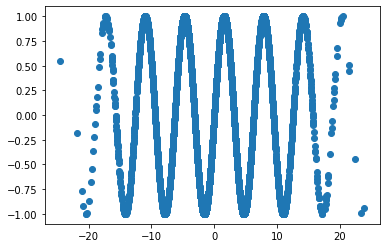

In [69]:
plt.scatter(train_data, train_targets)
plt.show()

In [70]:
def build_model():
    model = keras.Sequential([
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [71]:
model = build_model()
history = model.fit(train_data, train_targets,
              epochs=50, batch_size=128, validation_split = 0.2)

Epoch 1/50
63/63 [==============================] - 1s 4ms/step - loss: 0.5639 - mae: 0.6520 - val_loss: 0.5022 - val_mae: 0.6068
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4527 - mae: 0.5757 - val_loss: 0.4062 - val_mae: 0.5343
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.4051 - mae: 0.5276 - val_loss: 0.3846 - val_mae: 0.4849
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.3669 - mae: 0.4709 - val_loss: 0.3194 - val_mae: 0.4288
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3124 - mae: 0.4157 - val_loss: 0.2875 - val_mae: 0.3901
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2888 - mae: 0.3900 - val_loss: 0.2661 - val_mae: 0.3682
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.2656 - mae: 0.3557 - val_loss: 0.3114 - val_mae: 0.3820
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2628 - mae: 0.34

In [72]:
test_data = np.linspace(-2 * np.pi, 2 * np.pi, num = num_data_points)
test_targets = np.sin(test_data)

In [73]:
model.evaluate(test_data, test_targets)

313/313 [==============================] - 0s 937us/step - loss: 0.0109 - mae: 0.1022


[0.010885515250265598, 0.10217394679784775]

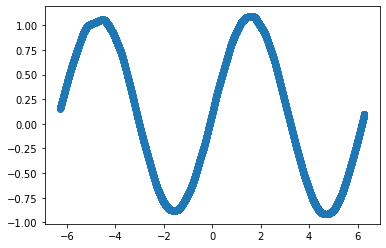

In [74]:
predicted = model.predict(test_data)
plt.scatter(test_data, predicted)
plt.show()

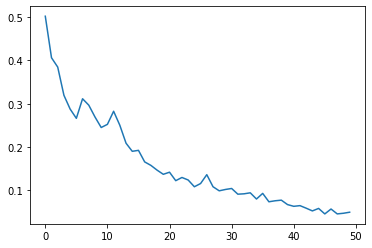

In [75]:
loss_hist = history.history["val_loss"]
plt.plot(loss_hist)